# Session 2: Limits and Continuity

This notebook explores the fundamental concept of limits, which form the foundation for derivatives and continuity.

## Learning Objectives
- Understand limits intuitively and formally
- Calculate limits using algebraic techniques
- Identify and handle indeterminate forms
- Connect limits to continuity
- Explore the squeeze theorem

## Key Limit Laws

If $\lim_{x \to a} f(x) = L$ and $\lim_{x \to a} g(x) = M$, then:

- **Sum**: $\lim_{x \to a} [f(x) + g(x)] = L + M$
- **Product**: $\lim_{x \to a} [f(x) \cdot g(x)] = L \cdot M$
- **Quotient**: $\lim_{x \to a} \frac{f(x)}{g(x)} = \frac{L}{M}$ (if $M \neq 0$)
- **Power**: $\lim_{x \to a} [f(x)]^n = L^n$

## Important Limits
- $\lim_{x \to 0} \frac{\sin x}{x} = 1$
- $\lim_{x \to 0} \frac{1 - \cos x}{x} = 0$
- $\lim_{x \to \infty} \left(1 + \frac{1}{x}\right)^x = e$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from sympy import symbols, limit, oo, sin, cos, exp, log

# Demonstrate the famous limit: lim(x→0) sin(x)/x = 1
def demonstrate_sinc_limit():
    x_vals = np.array([1, 0.5, 0.1, 0.05, 0.01, 0.005, 0.001, 0.0001])

    print("Demonstrating lim(x→0) sin(x)/x = 1")
    print("x\t\tsin(x)/x")
    print("-" * 25)

    for x in x_vals:
        val = np.sin(x) / x
        print(f"{x:g}\t\t{val:.8f}")

    # Also check negative values
    print("\nNegative values:")
    for x in -x_vals[:4]:
        val = np.sin(x) / x
        print(f"{x:g}\t\t{val:.8f}")

    # Symbolic verification
    x = symbols('x')
    symbolic_limit = limit(sin(x)/x, x, 0)
    print(f"\nSymbolic limit: {symbolic_limit}")

demonstrate_sinc_limit()

Demonstrating lim(x→0) sin(x)/x = 1
x		sin(x)/x
-------------------------
1		0.84147098
0.5		0.95885108
0.1		0.99833417
0.05		0.99958339
0.01		0.99998333
0.005		0.99999583
0.001		0.99999983
0.0001		1.00000000

Negative values:
-1		0.84147098
-0.5		0.95885108
-0.1		0.99833417
-0.05		0.99958339

Symbolic limit: 1


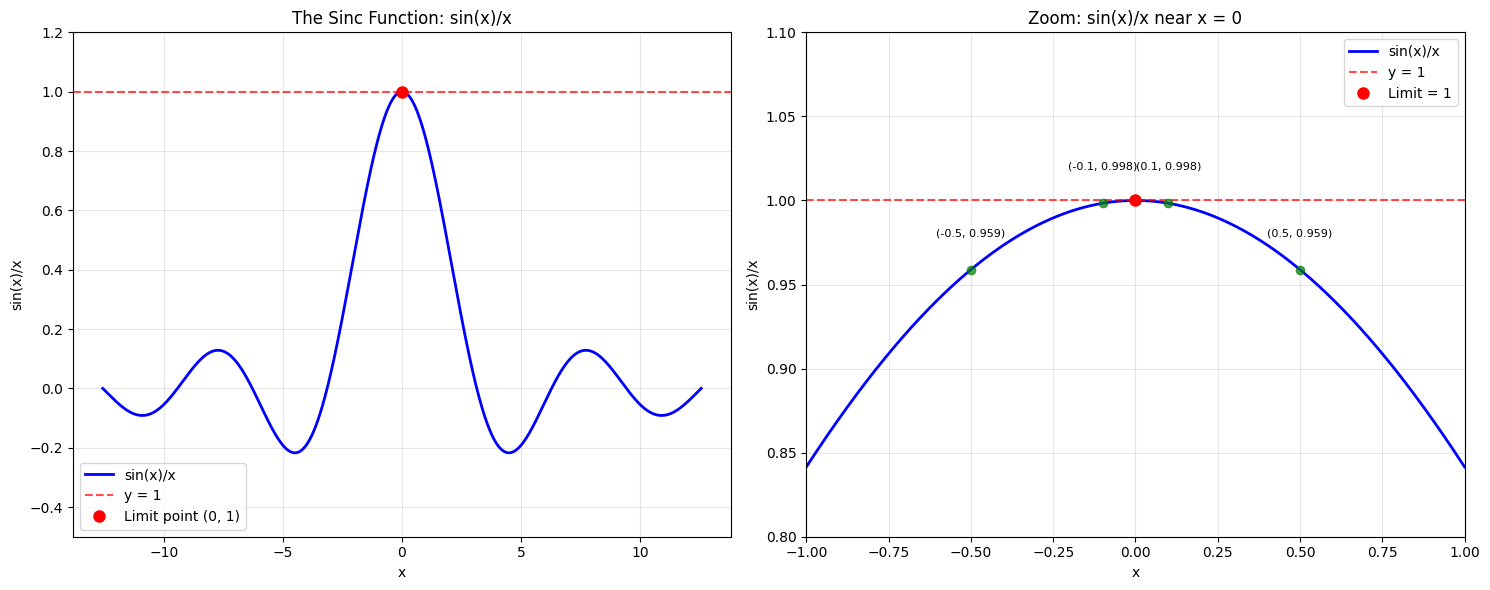

In [2]:
# Visualize the sinc function and its limit
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Wide view of sin(x)/x
x1 = np.linspace(-4*np.pi, 4*np.pi, 1000)
x1_nonzero = x1[x1 != 0]  # Remove x=0 to avoid division by zero
sinc1 = np.sin(x1_nonzero) / x1_nonzero

ax1.plot(x1_nonzero, sinc1, 'b-', linewidth=2, label='sin(x)/x')
ax1.axhline(y=1, color='red', linestyle='--', alpha=0.7, label='y = 1')
ax1.plot(0, 1, 'ro', markersize=8, label='Limit point (0, 1)')
ax1.set_xlabel('x')
ax1.set_ylabel('sin(x)/x')
ax1.set_title('The Sinc Function: sin(x)/x')
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.set_ylim(-0.5, 1.2)

# Plot 2: Zoom near x = 0
x2 = np.linspace(-1, 1, 1000)
x2_nonzero = x2[x2 != 0]
sinc2 = np.sin(x2_nonzero) / x2_nonzero

ax2.plot(x2_nonzero, sinc2, 'b-', linewidth=2, label='sin(x)/x')
ax2.axhline(y=1, color='red', linestyle='--', alpha=0.7, label='y = 1')
ax2.plot(0, 1, 'ro', markersize=8, label='Limit = 1')

# Add some specific points
test_points = [-0.5, -0.1, 0.1, 0.5]
for pt in test_points:
    y_val = np.sin(pt) / pt
    ax2.plot(pt, y_val, 'go', markersize=6, alpha=0.7)
    ax2.text(pt, y_val + 0.02, f'({pt:.1f}, {y_val:.3f})',
             ha='center', fontsize=8)

ax2.set_xlabel('x')
ax2.set_ylabel('sin(x)/x')
ax2.set_title('Zoom: sin(x)/x near x = 0')
ax2.legend()
ax2.grid(True, alpha=0.3)
ax2.set_xlim(-1, 1)
ax2.set_ylim(0.8, 1.1)

plt.tight_layout()
plt.show()

In [6]:
from sympy import symbols, sin, cos, exp, sqrt, limit, oo

# Solve various limit problems using SymPy
x = symbols('x')

# Collection of limit problems from MIT Problem Set 1D
limit_problems = [
    ((x**2 - 4)/(x - 2), 2, "Removable discontinuity"),
    ((sin(x) - x)/(x**3), 0, "Higher order infinitesimal"),
    ((1 - cos(x))/(x**2), 0, "Trigonometric limit"),
    ((exp(x) - 1)/x, 0, "Exponential limit"),
    ((x**3 + 8)/(x + 2), -2, "Factoring limit"),
    ((sqrt(x + 1) - 1)/x, 0, "Radical limit"),
    (x**2/exp(x), oo, "Exponential dominates polynomial")
]

print("MIT-Style Limit Problems:")
print("=" * 60)

for i, (expr, point, description) in enumerate(limit_problems, 1):
    try:
        result = limit(expr, x, point)
        print(f"{i}. {description}")
        print(f"   lim(x→{point}) {expr} = {result}")
        print()
    except Exception as e:
        print(f"{i}. {description}: Error - {e}")
        print()

# Special case: piecewise function
print("\nPiecewise Function Limit:")
print("f(x) = { x² if x < 1, 2x if x ≥ 1 }")

# Left and right limits at x = 1
left_limit = limit(x**2, x, 1, '-')
right_limit = limit(2*x, x, 1, '+')

print(f"Left limit: lim(x→1⁻) x² = {left_limit}")
print(f"Right limit: lim(x→1⁺) 2x = {right_limit}")
print(f"Limit exists: {left_limit == right_limit}")
print(f"Function value at x=1: f(1) = 2(1) = 2")
print(f"Continuous at x=1: {left_limit == right_limit == 2}")

MIT-Style Limit Problems:
1. Removable discontinuity
   lim(x→2) (x**2 - 4)/(x - 2) = 4

2. Higher order infinitesimal
   lim(x→0) (-x + sin(x))/x**3 = -1/6

3. Trigonometric limit
   lim(x→0) (1 - cos(x))/x**2 = 1/2

4. Exponential limit
   lim(x→0) (exp(x) - 1)/x = 1

5. Factoring limit
   lim(x→-2) (x**3 + 8)/(x + 2) = 12

6. Radical limit
   lim(x→0) (sqrt(x + 1) - 1)/x = 1/2

7. Exponential dominates polynomial
   lim(x→oo) x**2*exp(-x) = 0


Piecewise Function Limit:
f(x) = { x² if x < 1, 2x if x ≥ 1 }
Left limit: lim(x→1⁻) x² = 1
Right limit: lim(x→1⁺) 2x = 2
Limit exists: False
Function value at x=1: f(1) = 2(1) = 2
Continuous at x=1: False


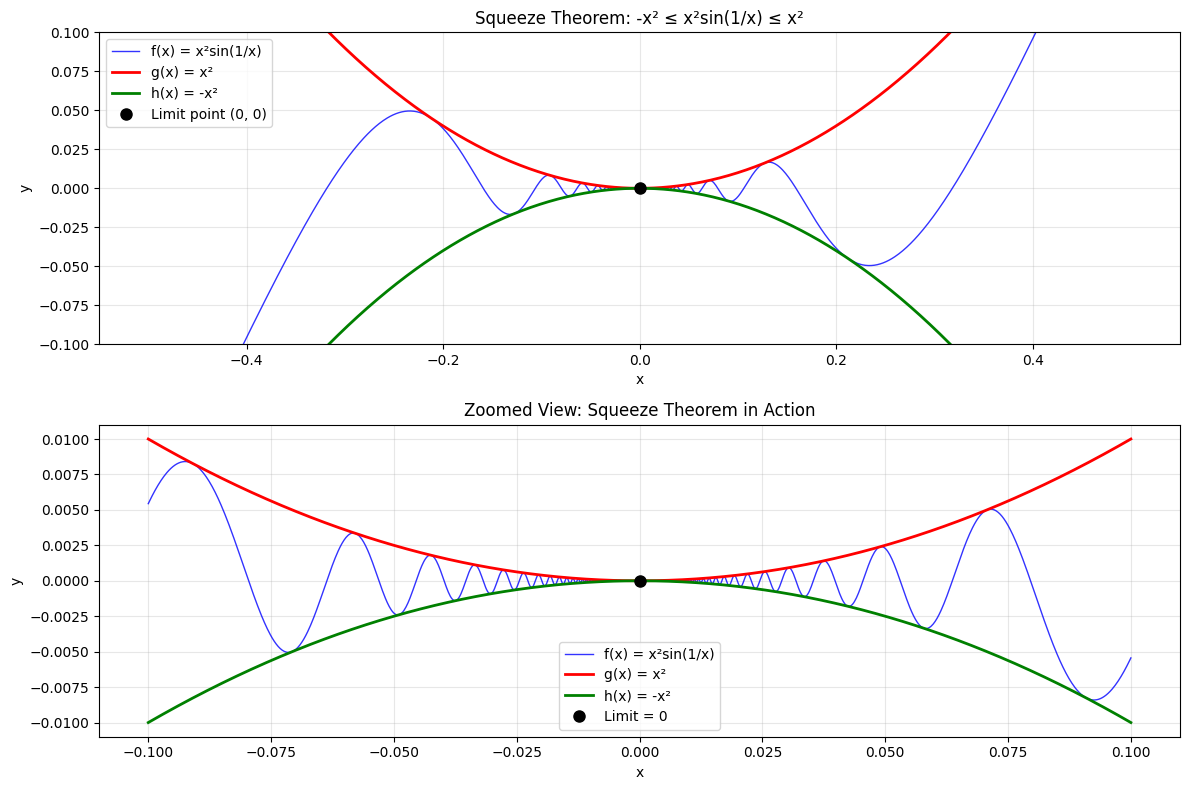

Symbolic limit of x²sin(1/x) as x→0: 0


In [7]:
# Squeeze Theorem demonstration
def squeeze_theorem_demo():
    """Demonstrate squeeze theorem with x²sin(1/x)"""

    x_vals = np.linspace(-0.5, 0.5, 1000)
    x_vals = x_vals[x_vals != 0]  # Remove x = 0

    # Functions for squeeze theorem
    f = x_vals**2 * np.sin(1/x_vals)  # Squeezed function
    upper = x_vals**2  # Upper bound
    lower = -x_vals**2  # Lower bound

    plt.figure(figsize=(12, 8))

    plt.subplot(2, 1, 1)
    plt.plot(x_vals, f, 'b-', linewidth=1, label='f(x) = x²sin(1/x)', alpha=0.8)
    plt.plot(x_vals, upper, 'r-', linewidth=2, label='g(x) = x²')
    plt.plot(x_vals, lower, 'g-', linewidth=2, label='h(x) = -x²')
    plt.plot(0, 0, 'ko', markersize=8, label='Limit point (0, 0)')

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Squeeze Theorem: -x² ≤ x²sin(1/x) ≤ x²')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.ylim(-0.1, 0.1)

    # Zoom near origin
    plt.subplot(2, 1, 2)
    x_zoom = np.linspace(-0.1, 0.1, 1000)
    x_zoom = x_zoom[x_zoom != 0]

    f_zoom = x_zoom**2 * np.sin(1/x_zoom)
    upper_zoom = x_zoom**2
    lower_zoom = -x_zoom**2

    plt.plot(x_zoom, f_zoom, 'b-', linewidth=1, label='f(x) = x²sin(1/x)', alpha=0.8)
    plt.plot(x_zoom, upper_zoom, 'r-', linewidth=2, label='g(x) = x²')
    plt.plot(x_zoom, lower_zoom, 'g-', linewidth=2, label='h(x) = -x²')
    plt.plot(0, 0, 'ko', markersize=8, label='Limit = 0')

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Zoomed View: Squeeze Theorem in Action')
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    # Symbolic verification
    x = symbols('x')
    squeeze_limit = limit(x**2 * sin(1/x), x, 0)
    print(f"Symbolic limit of x²sin(1/x) as x→0: {squeeze_limit}")

squeeze_theorem_demo()

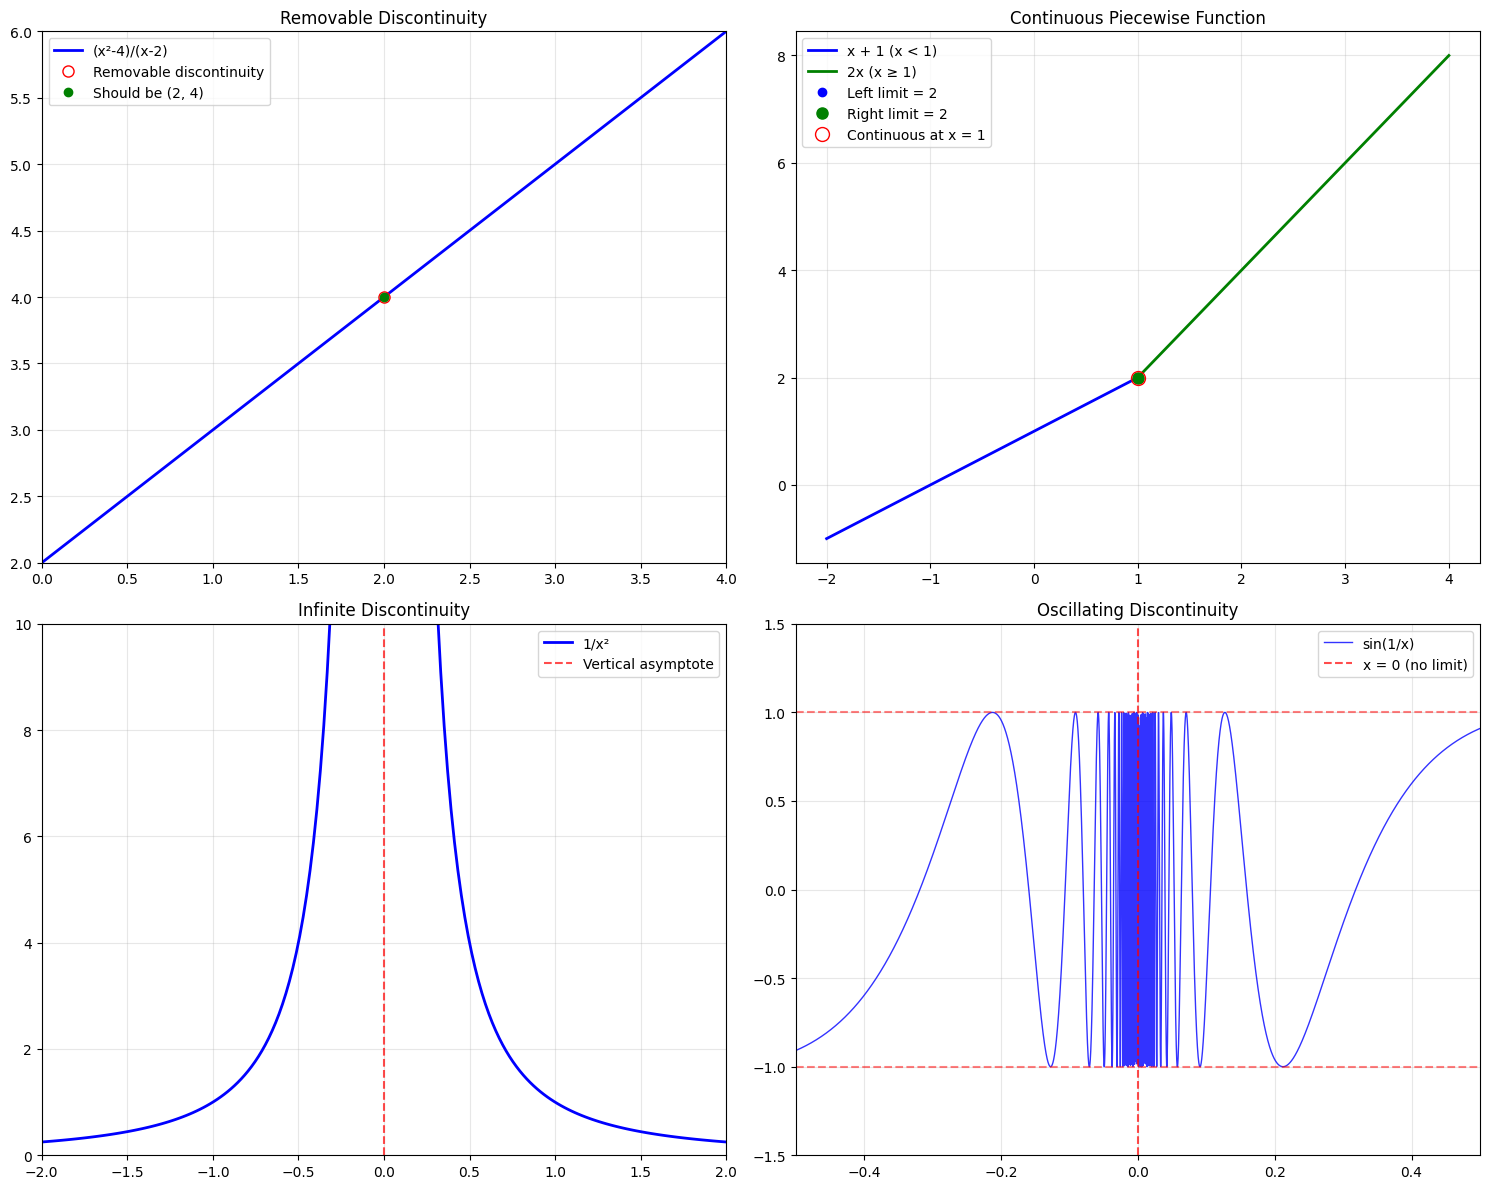

In [8]:
# Continuity analysis and types of discontinuities
def analyze_discontinuities():
    """
    Analyze different types of discontinuities from MIT Problem Set 1D
    """

    fig, axes = plt.subplots(2, 2, figsize=(15, 12))

    # 1. Removable discontinuity: (x²-4)/(x-2)
    x1 = np.linspace(-1, 5, 1000)
    x1_clean = x1[x1 != 2]  # Remove x = 2
    y1 = (x1_clean**2 - 4) / (x1_clean - 2)  # Simplifies to x + 2

    axes[0,0].plot(x1_clean, y1, 'b-', linewidth=2, label='(x²-4)/(x-2)')
    axes[0,0].plot(2, 4, 'ro', markersize=8, fillstyle='none',
                   label='Removable discontinuity')
    axes[0,0].plot(2, 4, 'go', markersize=6, label='Should be (2, 4)')
    axes[0,0].set_title('Removable Discontinuity')
    axes[0,0].legend()
    axes[0,0].grid(True, alpha=0.3)
    axes[0,0].set_xlim(0, 4)
    axes[0,0].set_ylim(2, 6)

    # 2. Jump discontinuity: piecewise function
    x2a = np.linspace(-2, 1, 100)
    x2b = np.linspace(1, 4, 100)
    y2a = x2a + 1  # Left piece
    y2b = 2*x2b   # Right piece

    axes[0,1].plot(x2a, y2a, 'b-', linewidth=2, label='x + 1 (x < 1)')
    axes[0,1].plot(x2b, y2b, 'g-', linewidth=2, label='2x (x ≥ 1)')
    axes[0,1].plot(1, 2, 'bo', markersize=6, label='Left limit = 2')
    axes[0,1].plot(1, 2, 'go', markersize=8, label='Right limit = 2')
    axes[0,1].plot(1, 2, 'ro', markersize=10, fillstyle='none',
                   label='Continuous at x = 1')
    axes[0,1].set_title('Continuous Piecewise Function')
    axes[0,1].legend()
    axes[0,1].grid(True, alpha=0.3)

    # 3. Infinite discontinuity: 1/x²
    x3a = np.linspace(-2, -0.01, 100)
    x3b = np.linspace(0.01, 2, 100)
    y3a = 1 / x3a**2
    y3b = 1 / x3b**2

    axes[1,0].plot(x3a, y3a, 'b-', linewidth=2, label='1/x²')
    axes[1,0].plot(x3b, y3b, 'b-', linewidth=2)
    axes[1,0].axvline(x=0, color='red', linestyle='--', alpha=0.7,
                      label='Vertical asymptote')
    axes[1,0].set_title('Infinite Discontinuity')
    axes[1,0].legend()
    axes[1,0].grid(True, alpha=0.3)
    axes[1,0].set_xlim(-2, 2)
    axes[1,0].set_ylim(0, 10)

    # 4. Oscillating discontinuity: sin(1/x)
    x4 = np.linspace(-0.5, 0.5, 10000)
    x4_clean = x4[x4 != 0]
    y4 = np.sin(1/x4_clean)

    axes[1,1].plot(x4_clean, y4, 'b-', linewidth=1, label='sin(1/x)', alpha=0.8)
    axes[1,1].axhline(y=1, color='red', linestyle='--', alpha=0.5)
    axes[1,1].axhline(y=-1, color='red', linestyle='--', alpha=0.5)
    axes[1,1].axvline(x=0, color='red', linestyle='--', alpha=0.7,
                      label='x = 0 (no limit)')
    axes[1,1].set_title('Oscillating Discontinuity')
    axes[1,1].legend()
    axes[1,1].grid(True, alpha=0.3)
    axes[1,1].set_xlim(-0.5, 0.5)
    axes[1,1].set_ylim(-1.5, 1.5)

    plt.tight_layout()
    plt.show()

analyze_discontinuities()

In [9]:
# MIT Problem Set 1D limit calculations
x = symbols('x')

mit_limits = [
    ("1D-1a", (x**2 - 1)/(x - 1), 1),
    ("1D-1b", (x**3 - 8)/(x - 2), 2),
    ("1D-1c", sin(x)/x, 0),
    ("1D-1d", (1 - cos(x))/x**2, 0),
    ("1D-1e", (exp(x) - 1)/x, 0),
    ("1D-1f", (log(x) - log(2))/(x - 2), 2),
    ("1D-1g", x/abs(x), 0),  # This has different left/right limits
    ("1D-1h", (sqrt(x) - 2)/(x - 4), 4),
    ("1D-1i", x**2 * sin(1/x), 0),
    ("1D-1j", (x**2 + x - 2)/(x**2 - 1), 1)
]

print("MIT Problem Set 1D Limit Solutions:")
print("=" * 50)

for problem, expr, point in mit_limits:
    try:
        if problem == "1D-1g":  # Special case: x/|x| at x=0
            left = limit(x/abs(x), x, 0, '-')
            right = limit(x/abs(x), x, 0, '+')
            print(f"{problem}: x/|x| at x=0")
            print(f"   Left limit: {left}")
            print(f"   Right limit: {right}")
            print(f"   Limit exists: {left == right}")
        else:
            result = limit(expr, x, point)
            print(f"{problem}: lim(x→{point}) {expr} = {result}")
    except Exception as e:
        print(f"{problem}: Error computing limit - {e}")
    print()

# Demonstrate L'Hôpital's rule for indeterminate forms
print("\nL'Hôpital's Rule Applications:")
print("-" * 35)

# Example: lim(x→0) (sin(x) - x)/x³
numerator = sin(x) - x
denominator = x**3

print("Problem: lim(x→0) (sin(x) - x)/x³")
print("This is 0/0 form, apply L'Hôpital's rule:")

# First application
num1 = sp.diff(numerator, x)
den1 = sp.diff(denominator, x)
print(f"First: lim(x→0) {num1}/{den1}")

# Second application
num2 = sp.diff(num1, x)
den2 = sp.diff(den1, x)
print(f"Second: lim(x→0) {num2}/{den2}")

# Final result
final_result = limit(num2/den2, x, 0)
print(f"Final result: {final_result}")

# Verify with direct symbolic computation
direct_result = limit((sin(x) - x)/x**3, x, 0)
print(f"Direct symbolic result: {direct_result}")

MIT Problem Set 1D Limit Solutions:
1D-1a: lim(x→1) (x**2 - 1)/(x - 1) = 2

1D-1b: lim(x→2) (x**3 - 8)/(x - 2) = 12

1D-1c: lim(x→0) sin(x)/x = 1

1D-1d: lim(x→0) (1 - cos(x))/x**2 = 1/2

1D-1e: lim(x→0) (exp(x) - 1)/x = 1

1D-1f: lim(x→2) (log(x) - log(2))/(x - 2) = 1/2

1D-1g: x/|x| at x=0
   Left limit: -1
   Right limit: 1
   Limit exists: False

1D-1h: lim(x→4) (sqrt(x) - 2)/(x - 4) = 1/4

1D-1i: lim(x→0) x**2*sin(1/x) = 0

1D-1j: lim(x→1) (x**2 + x - 2)/(x**2 - 1) = 3/2


L'Hôpital's Rule Applications:
-----------------------------------
Problem: lim(x→0) (sin(x) - x)/x³
This is 0/0 form, apply L'Hôpital's rule:
First: lim(x→0) cos(x) - 1/3*x**2
Second: lim(x→0) -sin(x)/6*x
Final result: -1/6
Direct symbolic result: -1/6
